# Test forecast package

Let's take the opportunity to study the `forecast` package in R, and other classic R packages in my case.

Follow https://www.datascience.com/blog/introduction-to-forecasting-with-arima-in-r-learn-data-science-tutorials

In [1]:
library('readr') # data input
library('tibble') # data wrangling
library('reshape2') # data manipulation
library('dplyr') # data manipulation

library('ggplot2') # visualization

library('lubridate') # date and time
library('tseries') # time series analysis
library('forecast') # time series analysis

options(repr.plot.width=8, repr.plot.height=4)


Attaching package: 'dplyr'

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union


Attaching package: 'lubridate'

The following object is masked from 'package:base':

    date

Loading required package: zoo

Attaching package: 'zoo'

The following objects are masked from 'package:base':

    as.Date, as.Date.numeric

Loading required package: timeDate
This is forecast 7.3 



In [2]:
df <- read_csv('../data/processed/df.csv')

Parsed with column specification:
cols(
  .default = col_double(),
  Page = col_character(),
  agent = col_character(),
  access = col_character(),
  project = col_character(),
  pagename = col_character()
)
See spec(...) for full column specifications.


In [3]:
head(df)

Page,2015-07-01,2015-07-02,2015-07-03,2015-07-04,2015-07-05,2015-07-06,2015-07-07,2015-07-08,2015-07-09,...,2016-12-26,2016-12-27,2016-12-28,2016-12-29,2016-12-30,2016-12-31,agent,access,project,pagename
2NE1_zh.wikipedia.org_all-access_spider,18,11,5,13,14,9,9,22,26,...,14,20,22,19,18,20,spider,all-access,zh.wikipedia.org,2NE1
2PM_zh.wikipedia.org_all-access_spider,11,14,15,18,11,13,22,11,10,...,9,30,52,45,26,20,spider,all-access,zh.wikipedia.org,2PM
3C_zh.wikipedia.org_all-access_spider,1,0,1,1,0,4,0,3,4,...,4,4,6,3,4,17,spider,all-access,zh.wikipedia.org,3C
4minute_zh.wikipedia.org_all-access_spider,35,13,10,94,4,26,14,9,11,...,16,11,17,19,10,11,spider,all-access,zh.wikipedia.org,4minute
52_Hz_I_Love_You_zh.wikipedia.org_all-access_spider,NA,NA,NA,NA,NA,NA,NA,NA,NA,...,3,11,27,13,36,10,spider,all-access,zh.wikipedia.org,52_Hz_I_Love_You
5566_zh.wikipedia.org_all-access_spider,12,7,4,5,20,8,5,17,24,...,32,19,23,17,17,50,spider,all-access,zh.wikipedia.org,5566


Let's train only on a row time series, like Pokemon ^^

In [4]:
input <- melt(df %>% select(-c(Page, agent, access, project, pagename)) %>% slice(1))

No id variables; using all as measure variables


In [5]:
head(input)

variable,value
2015-07-01,18
2015-07-02,11
2015-07-03,5
2015-07-04,13
2015-07-05,14
2015-07-06,9


## Plot some data

In [6]:
input$Date = as.Date(input$variable)

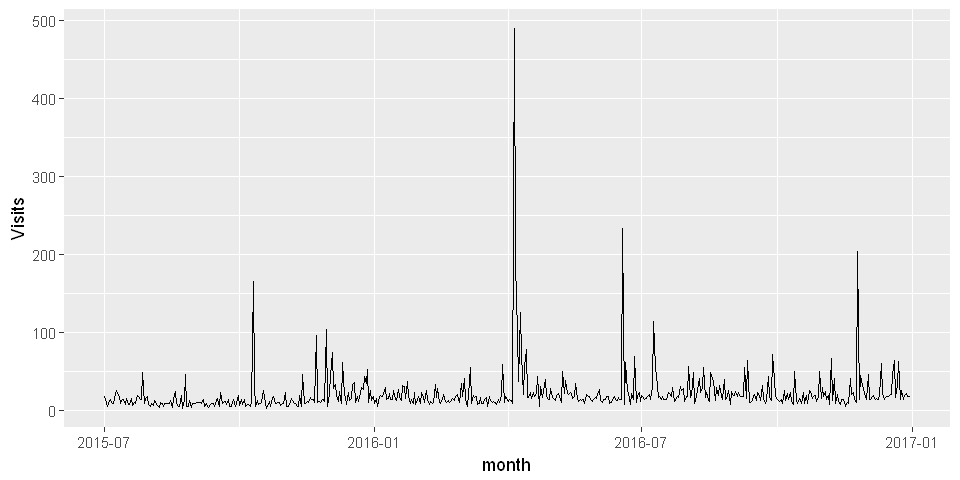

In [7]:
ggplot(input, aes(Date, value)) + geom_line() + scale_x_date('month')  + ylab("Visits") + xlab("Date")

Some big values here. R provides a convenient method for removing time series outliers: tsclean() as part of its forecast package. tsclean() identifies and replaces outliers using series smoothing and decomposition. This method is also capable of inputing missing values in the series if there are any.

Note that we are using the ts() command to create a time series object to pass to tsclean():

In [8]:
count_ts = ts(input[, c('value')])
input$visits_cleaned = tsclean(count_ts)

Don't know how to automatically pick scale for object of type ts. Defaulting to continuous.


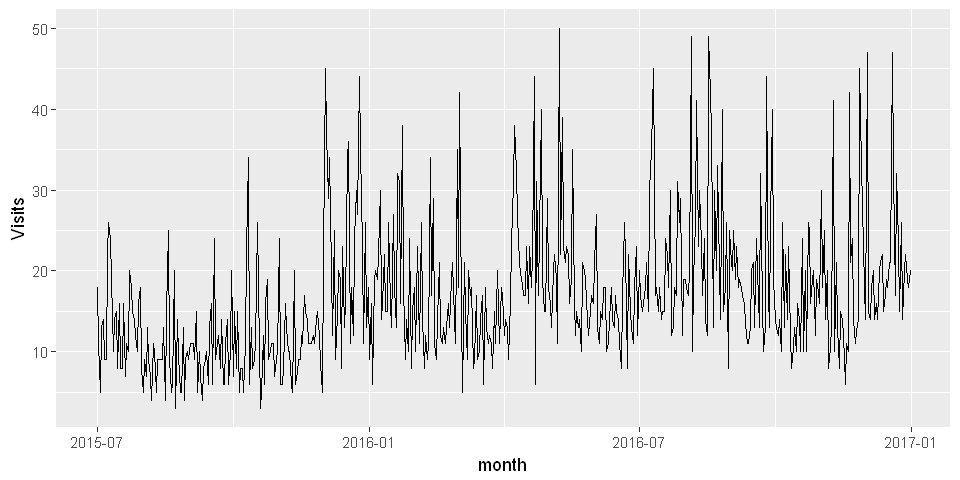

In [9]:
ggplot(input, aes(Date, visits_cleaned)) + geom_line() + scale_x_date('month')  + ylab("Visits") + xlab("Date")

In [10]:
input$visits_ma = ma(input$visits_cleaned, order=7)
input$visits_ma30 = ma(input$visits_cleaned, order=30)

Don't know how to automatically pick scale for object of type ts. Defaulting to continuous.
Warning message:
"Removed 6 rows containing missing values (geom_path)."Warning message:
"Removed 30 rows containing missing values (geom_path)."

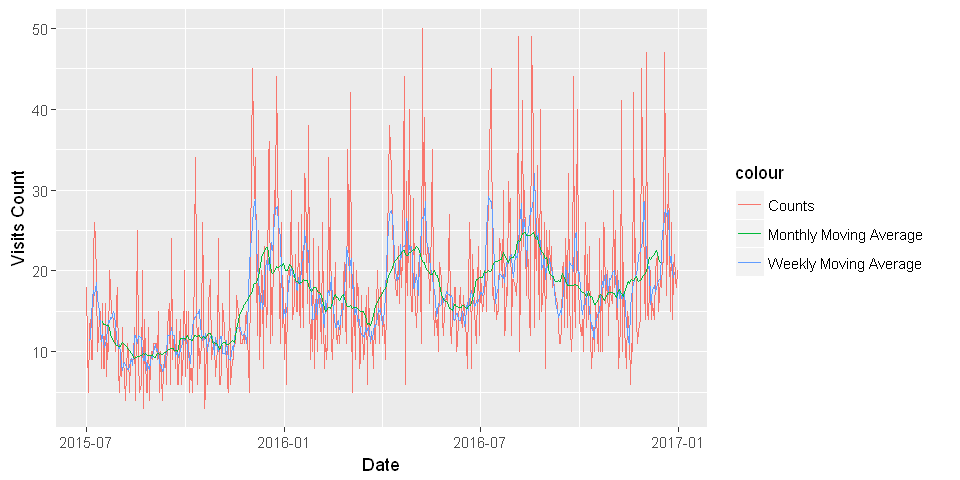

In [11]:
ggplot() +
  geom_line(data = input, aes(x = Date, y = visits_cleaned, colour = "Counts")) +
  geom_line(data = input, aes(x = Date, y = visits_ma,   colour = "Weekly Moving Average"))  +
  geom_line(data = input, aes(x = Date, y = visits_ma30, colour = "Monthly Moving Average"))  + 
  ylab('Visits Count')

## Timeseries decomposition